In [2]:
import numpy as np
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y prueba

2023-11-17 18:30:20.066169: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-17 18:30:20.564108: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-17 18:30:20.566443: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-17 18:30:22.265319: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
def map_range(value, min_, max_):
        return ((value-np.min(value))/(np.max(value)-np.min(value))) * (max_ - min_)


(2, 1000)
(2,)


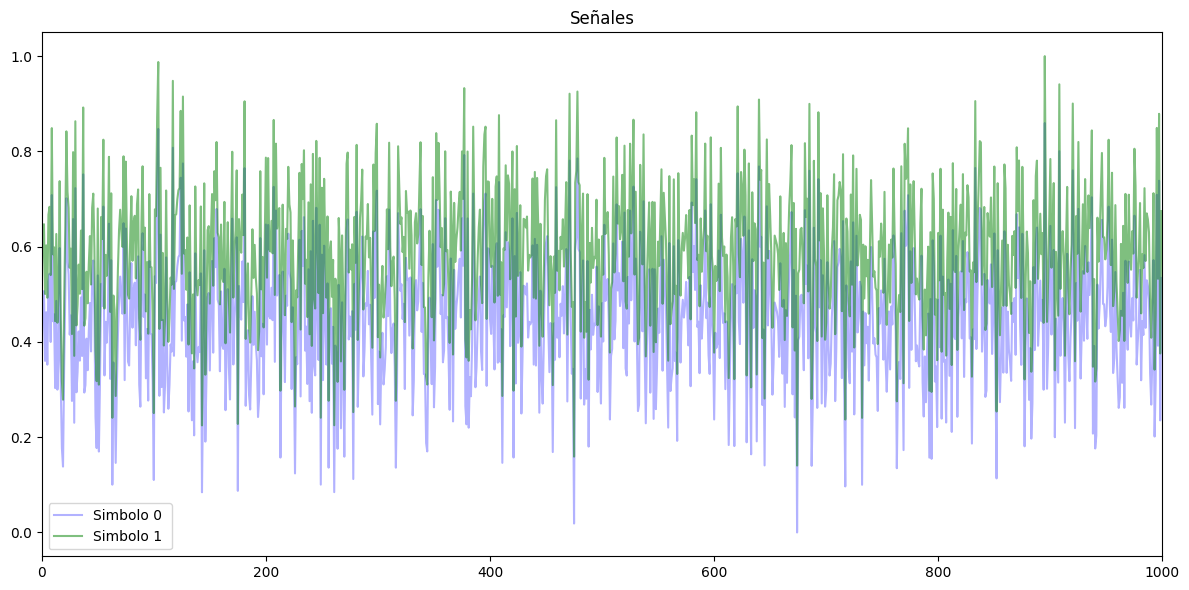

In [4]:
a1 = 1       # Valor del símbolo a1
a0 = 0    # Valor del símbolo a0
Nsamples = 1000 # Muestras de tiempo por símbolo
# Probabilidades de los símbolos
p_0 = 0.5
p_1 = 1 - p_0

amp_noise = 0.5

Nsymbols = 2 # Número total de símbolos
N = Nsymbols * Nsamples  # Número total de muestras

#time = np.linspace(0, N, N)
time = np.linspace(0, Nsamples, Nsamples)

# Genera una secuencia de símbolos basados en las probabilidades dadas
#data = np.random.choice([a0, a1], size=Nsymbols, p=[p_0, p_1])
data = np.array([a0, a1])

# Repite cada símbolo según el número de muestras por símbolo
#data = np.concatenate([[v]*Nsamples for v in data])

data_d1 = [data[0]]*Nsamples
data_d2 = [data[1]]*Nsamples

#message_org = data  # Almacena la secuencia completa en la variable 'message'

message_org = np.array([data[0],
                       data[1]])

o2 = 1

#print(message_org.shape)

#noise = np.random.normal(0, o2, N)
noise = np.random.normal(0,o2,Nsamples)

data_d1_corrupt = data_d1 + noise
data_d2_corrupt = data_d2 + noise

message_corrupt = np.array([data_d1_corrupt,data_d2_corrupt])

#print(message_corrupt.shape)

print(message_corrupt.shape)
print(message_org.shape)

#message_corrupt = message_corrupt.reshape(-1, 1)  # Redimensionar para que cada muestra sea un vector de entrada
#message_org = message_org.reshape(-1, 1)   

message_corrupt = map_range(message_corrupt, 0, 1)
#message_org = map_range(message_org, 0, 1)

#separar datos de validacion y testeo
#message_corrupt_train, message_corrupt_test, message_org_train, message_org_test = train_test_split(message_corrupt, message_org, test_size=0.2, random_state=42)

#signal_corrupt = np.concatenate(message_corrupt[0],message_corrupt[1])
#signal_org = np.concatenate(message_org[0],message_org[1])
#signal_t = np.concatenate(time,time+len(time))


plt.figure(figsize=(12,6),tight_layout=True)  #modificar el tamaño (x,y)
plt.plot(message_corrupt[0], '-b', label='Simbolo 0', alpha=0.3)
plt.plot(message_corrupt[1], '-g',label='Simbolo 1 ', alpha = 0.5)
#plt.step(time,y_pred_test, '-r',label='Señal Recuperada', alpha=0.3)
plt.xlim(0,Nsamples)
plt.title(f'Señales')
plt.legend()
plt.show()

In [5]:

entrada = tf.keras.layers.Dense(units=Nsamples//2, input_shape=[Nsamples])
#entrada = tf.keras.layers.Flatten(uints=2, input_shape=(len(message_org),1)), #1 - blanco y negro
capa1   = tf.keras.layers.Dense(units=30, activation='relu')
capa2   = tf.keras.layers.Dense(units=20, activation='relu')
capa3   = tf.keras.layers.Dense(units=10, activation='relu')
salida  = tf.keras.layers.Dense(units=1, activation='sigmoid')
modelo  = tf.keras.Sequential([entrada, capa1, capa2,capa3, salida])


# Compilación del modelo
modelo.compile(optimizer='adam', 
               loss=tf.keras.losses.mean_squared_error,
               metrics=['accuracy']
              )

historial=modelo.fit(message_corrupt, message_org, epochs=100) #validation_data=()

#loss, accuracy = modelo.evaluate(X_test, y_test)

#print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Predecir y evaluar los resultados
y_pred_test = modelo.predict(message_corrupt)
print(y_pred_test)




Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.2518 - accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 0.4049 - accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 0.2458 - accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 19ms/step - loss: 0.2528 - accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 0.2491 - accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 0.2532 - accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 0s 19ms/step - loss: 0.2484 - accuracy: 0.5000
Epoch 8/100
1/1 [==============================] - 0s 19ms/step - loss: 0.2456 - accuracy: 0.5000
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 0.2452 - accuracy: 0.5000
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 0.2432 - accuracy: 0.5000
Epoch 11/100
1/1 

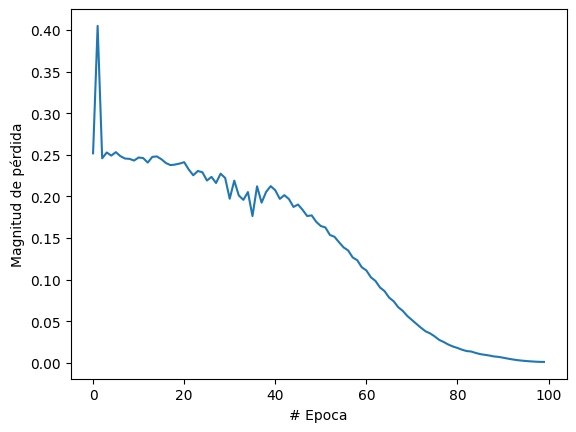

In [6]:
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

4/4 [==============================] - 0s 5ms/step
(100, 1000)
(100, 1)
Original: (100, 1000)    Reconstruida: [0.3675959]
Original: (100, 1000)    Reconstruida: [0.40027282]
Original: (100, 1000)    Reconstruida: [0.41500726]
Original: (100, 1000)    Reconstruida: [0.45249572]


ValueError: x and y must have same first dimension, but have shapes (100000,) and (100, 1000)

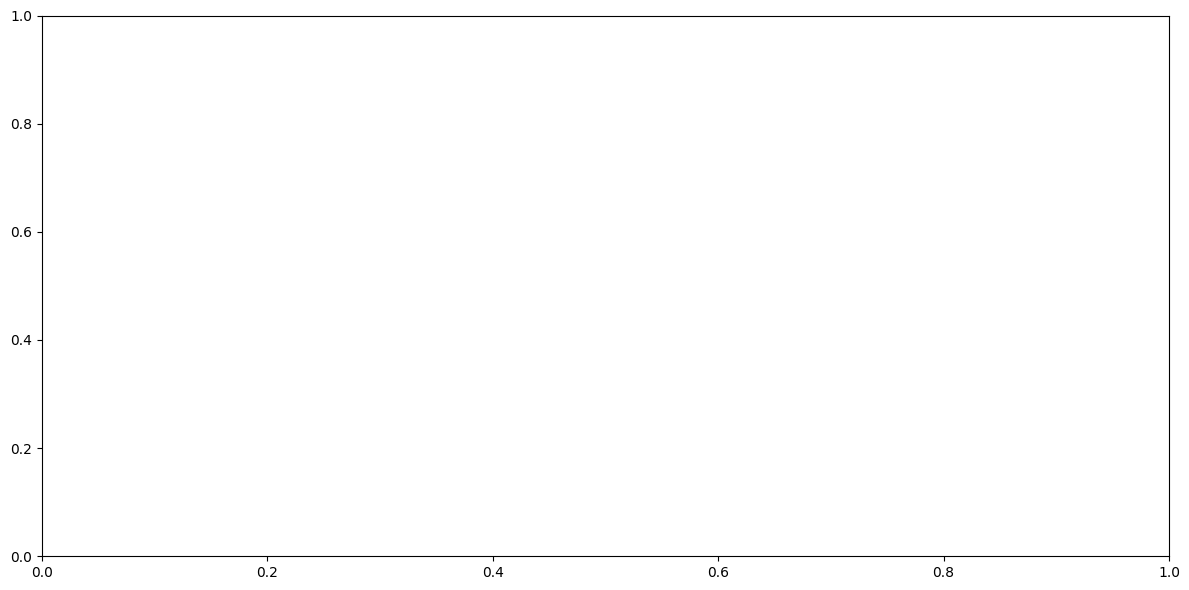

In [7]:
a1 = 1       # Valor del símbolo a1
a0 = 0    # Valor del símbolo a0
Nsamples = Nsamples # Muestras de tiempo por símbolo
# Probabilidades de los símbolos
p_0 = 0.5
p_1 = 1 - p_0

amp_noise = 0.2

Nsymbols = 100 # Número total de símbolos
N = Nsymbols * Nsamples  # Número total de muestras

time = np.linspace(0, N, N)

data_test = np.random.choice([a0, a1], size=Nsymbols, p=[p_0, p_1])
data_test = np.concatenate([[v]*Nsamples for v in data_test])


message_test = data_test
noise_test = np.random.normal(0, o2, N)
message_corrupt_test  = message_test + noise_test*amp_noise

num_partes = len(message_corrupt_test)/Nsamples

message_corrupt_test = np.array(np.split(message_corrupt_test, num_partes))
message_test = np.array(np.split(message_test,num_partes))

#message_corrupt_test = message_corrupt_test.reshape(-1, 1)  # Redimensionar para que cada muestra sea un vector de entrada

#message_corrupt_test = map_range(message_corrupt_test,0,1)

message_predict = modelo.predict(message_corrupt_test)
#message_predict_ = message_predict.reshape(1, -1)[0]

print(message_corrupt_test.shape)
print(message_predict.shape)

#print(max(message_predict_))

for i in range(0,40,10):
    print(f"Original: {message_test.shape}    Reconstruida: {message_predict[i]}")

# Predecir y aplicar umbral



values = [-1.1,-0.1]
message_predict = [values[np.argmax(dato)] for dato in message_predict]

plt.figure(figsize=(12,6),tight_layout=True)  #modificar el tamaño (x,y)
plt.step(time,message_test, '-b', label='Señal Original', alpha=0.6)
plt.step(time,message_predict, '-g',label='Señal Reconstruida', alpha=0.7)
plt.step(time,message_corrupt_test, alpha=0.2)
plt.xlim(0,int(N))
plt.title(f'Señales')
plt.legend()
plt.show()



In [ ]:
simbol = 0
simbol = [simbol]*Nsamples
message_predict = modelo.predict([simbol])
print(message_predict) 

NameError: name 'Nsamples' is not defined

In [ ]:
print(len(message_test))


100


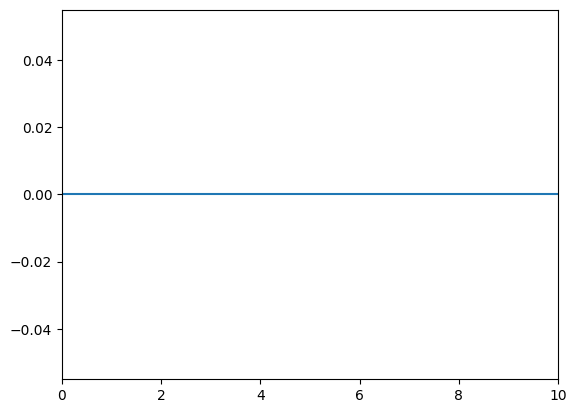

In [ ]:
plt.plot(message_test[0:2])
plt.xlim(0,10)
plt.show()

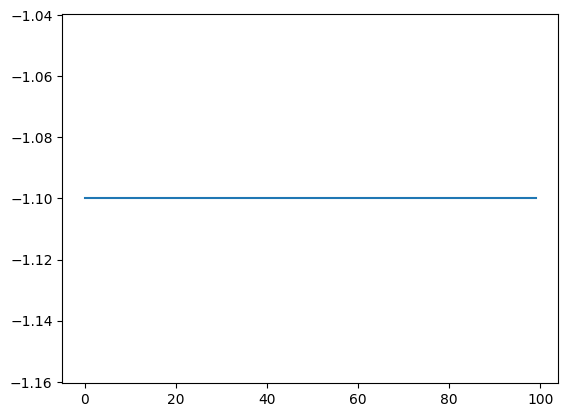

In [ ]:
plt.plot(message_predict)
plt.show()

(array([2511.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2489.]),
 array([-1.1, -1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1]),
 <BarContainer object of 10 artists>)

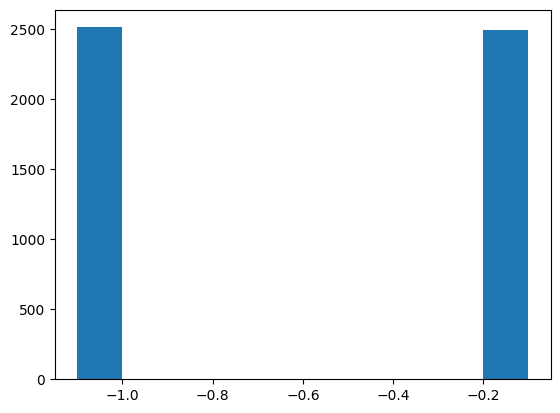

In [ ]:
plt.hist(message_predict)